In [2]:
import time
import mysql.connector
import pandas as pd
from datetime import datetime
import pymysql
from dotenv import load_dotenv
import os

load_dotenv()

host = os.getenv('DB_HOST')
user = os.getenv('DB_USER')
password = os.getenv('DB_PASSWORD')
database = os.getenv('DB_NAME')

try:
    conexao = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    print("Conexão com o banco de dados estabelecida com sucesso.")
except mysql.connector.Error as err:
    print(f"Erro ao conectar ao banco de dados: {err}")
    exit(1)

cursor = conexao.cursor()

Conexão com o banco de dados estabelecida com sucesso.


In [3]:
### Execute para resetar o banco de dados
with open('../sql/0.0.0-Resetar_db.sql', 'r') as file:
    query_reset = file.read()

cursor.execute(query_reset)

In [2]:
with open('../sql/1-Quem_gasta_mais.sql', 'r') as file:
    query = file.read()

with open('../sql/2-Consulta_cliente.sql', 'r') as file:
    query_consulta_cliente = file.read()

with open('../sql/5-Melhor_dia_de_venda.sql', 'r') as file:
    query_7 = file.read()


In [3]:
cursor.execute(query)

resultados = cursor.fetchall()

print(resultados)

[('Desconhecido', 2467.39, 0.0, 32, 77.11, 2467.39), ('Rossine Silveira Da Silva', 1167.8, 0.0, 25, 46.71, 1167.8), ('Lucas Barbosa Da Silva', 980.92, 0.0, 24, 40.87, 980.92), ('Vynnycius Rodrigues Silva', 945.8, 0.0, 13, 72.75, 945.8), ('Matheus Henrique De Souza Pinheiro', 969.0, -117.0, 12, 71.0, 852.0), ('Filipe Ramon Silva Carvalho Das Neves', 727.5, 0.0, 2, 363.75, 727.5), ('Victor Veras Da Silva', 685.7, 0.0, 19, 36.09, 685.7), ('Yano Machado Bezerra', 676.0, 0.0, 4, 169.0, 676.0), ('Pamela Monteiro Braga', 675.0, 0.0, 2, 337.5, 675.0), ('Camila Santos Oliveira', 597.59, 0.0, 12, 49.8, 597.59), ('Elias Amparo Santos', 578.22, 0.0, 20, 28.91, 578.22), ('Lucas Gabriel Dos Santos', 573.5, 0.0, 12, 47.79, 573.5), ('Wictor De Sousa Gomes', 535.0, 0.0, 1, 535.0, 535.0), ('Israel De Jesus Santos', 521.0, 0.0, 8, 65.12, 521.0), ('Carlos Eduardo Da Silva Costa', 500.0, 0.0, 1, 500.0, 500.0), ('Cristhyan Pauloto Resende', 461.0, 0.0, 7, 65.86, 461.0), ('Cleiton Viegas Da Silva', 445.4, 0.

In [4]:
# query = query.replace('Pix recebido', 'Pix recebido atualizado')

df = pd.read_sql(query, conexao)

print(df)

                                    Cliente  Total_Recebido  Total_Enviado  \
0                              Desconhecido         2467.39           0.00   
1                 Rossine Silveira Da Silva         1167.80           0.00   
2                    Lucas Barbosa Da Silva          980.92           0.00   
3                 Vynnycius Rodrigues Silva          945.80           0.00   
4        Matheus Henrique De Souza Pinheiro          969.00        -117.00   
..                                      ...             ...            ...   
341                           Walmar Junior            0.00        -360.02   
342                     Isana Melo Da Silva            0.00        -700.00   
343     Sebastiao Junio De Oliveira Cardoso            0.00        -807.50   
344  Thiago Henrique Paes Landim Dos Santos            0.00       -1150.00   
345              David Ramos Da Silva Alves            0.00       -1170.00   

     Total_Transacoes  Media_Valor_Transacao  DiferenÃ§a  
0   

C:\Users\brenn\AppData\Local\Temp\ipykernel_9328\3443321955.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexao)


Index(['Cliente', 'Total_Recebido', 'Total_Enviado', 'Total_Transacoes',
       'Media_Valor_Transacao', 'DiferenÃ§a'],
      dtype='object')


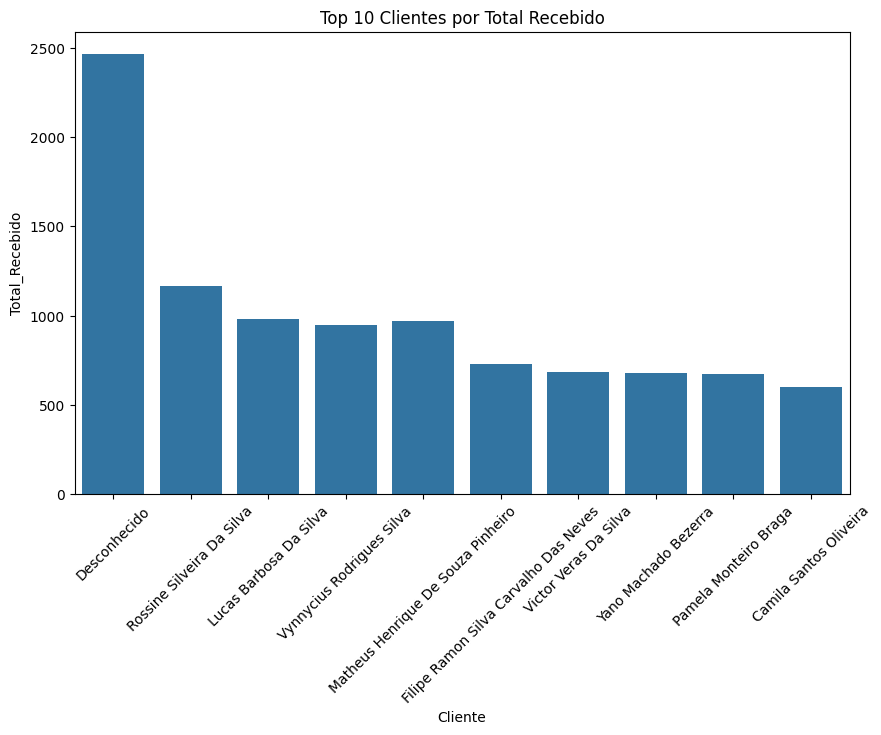

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.columns)

plt.figure(figsize=(10, 6))
sns.barplot(x='Cliente', y='Total_Recebido', data=df.head(10))
plt.xticks(rotation=45)
plt.title('Top 10 Clientes por Total Recebido')
plt.show()

In [6]:
cliente = 'Lucas Barbosa Da Silva'

query_consulta_cliente = query_consulta_cliente.format(cliente=cliente)

df_c = pd.read_sql(query_consulta_cliente, conexao)

print(df_c.head())

   Transacao                 Cliente Tipo_Movimentacao  Valor     Coins  \
0        163  Lucas Barbosa Da Silva      pix recebido   40.0  -4618.00   
1        164  Lucas Barbosa Da Silva      pix recebido   23.0  -2655.35   
2        229  Lucas Barbosa Da Silva      pix recebido   22.0  -2539.90   
3        281  Lucas Barbosa Da Silva      pix recebido  230.0 -26553.50   
4        283  Lucas Barbosa Da Silva      pix recebido   18.0  -2078.10   

   Pontos        Data  
0       0  2025-01-11  
1       0  2025-01-11  
2       0  2025-01-09  
3       0  2025-01-06  
4       0  2025-01-06  


C:\Users\brenn\AppData\Local\Temp\ipykernel_9328\1872410786.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_c = pd.read_sql(query_consulta_cliente, conexao)


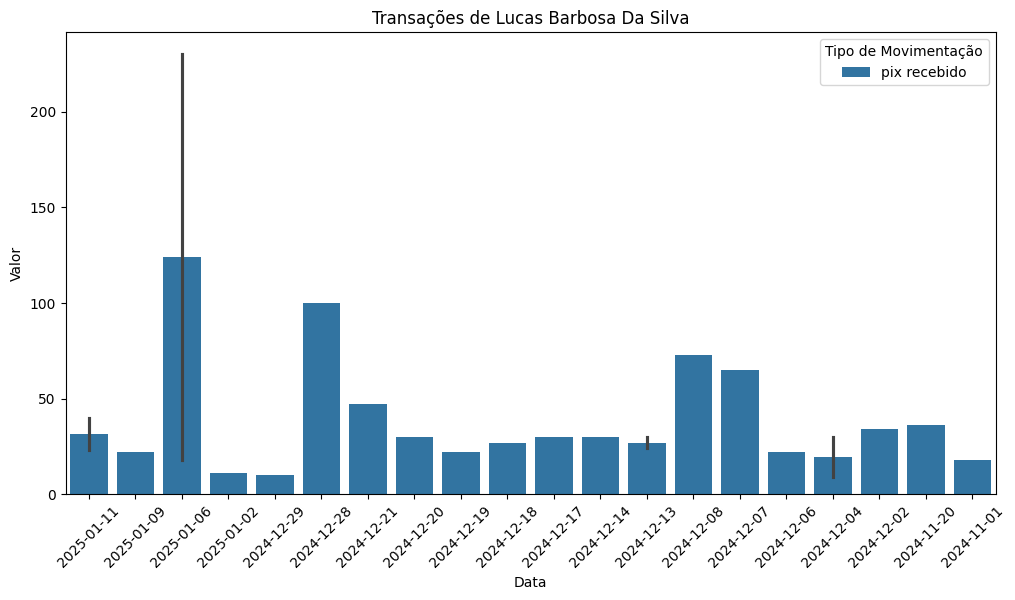

In [7]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Data', y='Valor', hue='Tipo_Movimentacao', data=df_c)
plt.xticks(rotation=45)
plt.title(f'Transações de {cliente}')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend(title='Tipo de Movimentação')
plt.show()

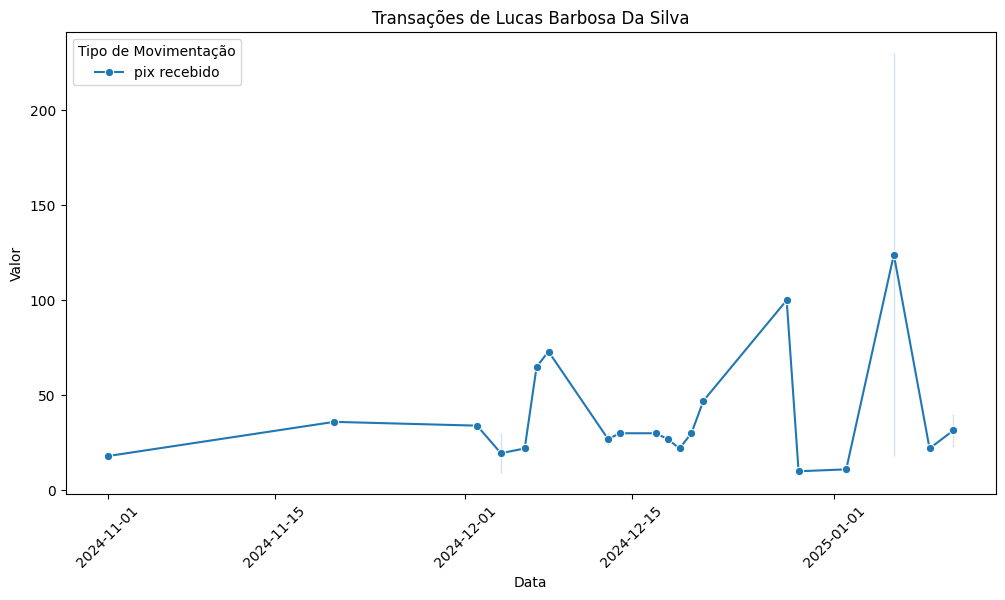

In [8]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Data', y='Valor', hue='Tipo_Movimentacao', data=df_c, marker='o')
plt.xticks(rotation=45)
plt.title(f'Transações de {cliente}')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend(title='Tipo de Movimentação')
plt.show()

In [9]:
conexao2 = pymysql.connect(
    host='localhost',
    user='root',
    password= 'Warspear17@',
    database='db_ws'
)


query_mes = query_7.format(mes=12, ano=2024)

df_7 = pd.read_sql(query_mes, conexao2)

print(df_7)

    Dia_Do_Mes  Total_Vendas  Numero_Transacoes  Media_Valor_Transacao
0           27       1256.30                 32                  39.26
1            6       1187.45                 32                  37.11
2           28       1180.40                 32                  36.89
3           20       1040.44                 17                  61.20
4           31        995.15                 18                  55.29
5            2        931.40                 21                  44.35
6           19        737.00                 17                  43.35
7           22        733.50                 19                  38.61
8           21        729.40                 19                  38.39
9           29        713.00                 25                  28.52
10          23        701.70                 14                  50.12
11           5        598.30                 14                  42.74
12          24        542.76                 15                  36.18
13    

C:\Users\brenn\AppData\Local\Temp\ipykernel_9328\400979156.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_7 = pd.read_sql(query_mes, conexao2)


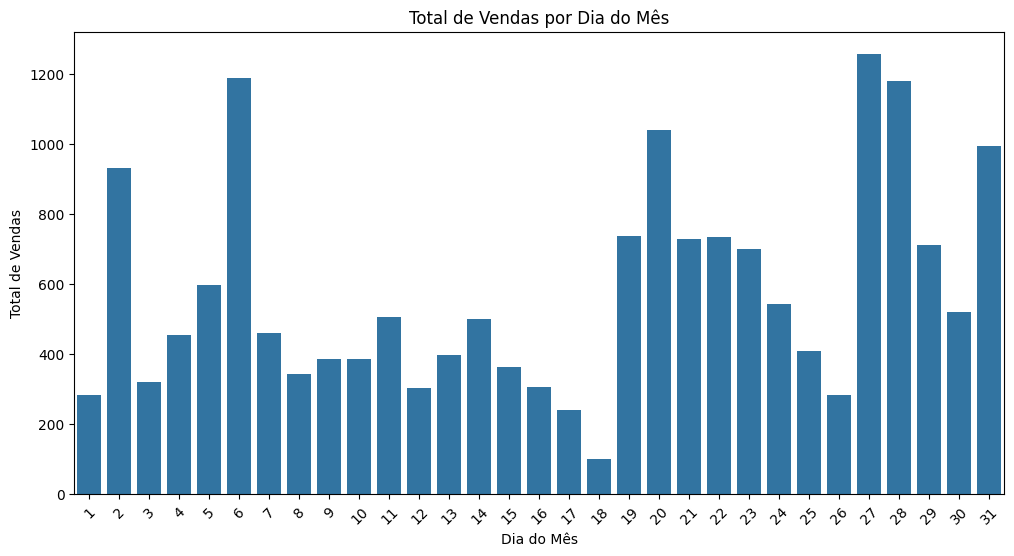

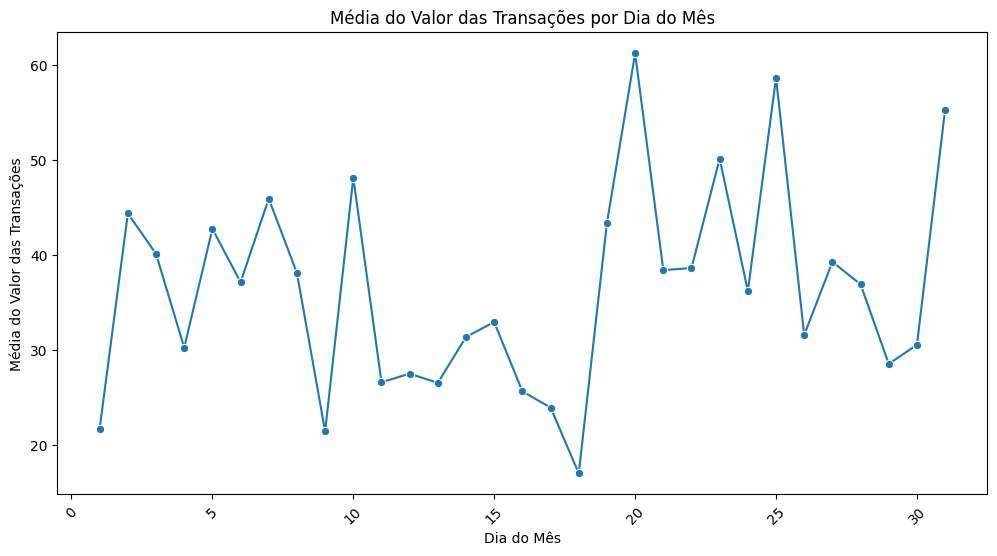

In [10]:
# Exemplo de gráfico de barras para visualizar o total de vendas por dia do mês
plt.figure(figsize=(12, 6))
sns.barplot(x='Dia_Do_Mes', y='Total_Vendas', data=df_7)
plt.xticks(rotation=45)
plt.title('Total de Vendas por Dia do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Total de Vendas')
plt.show()

# Exemplo de gráfico de linha para visualizar a média do valor das transações por dia do mês
plt.figure(figsize=(12, 6))
sns.lineplot(x='Dia_Do_Mes', y='Media_Valor_Transacao', data=df_7, marker='o')
plt.xticks(rotation=45)
plt.title('Média do Valor das Transações por Dia do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Média do Valor das Transações')
plt.show()